# Analysis of the Gapminder dataset

## 1. Read, inspect, and clean data

Upon downloading the raw Gapminder data from Github and reading it into a `pandas` `DataFrame`, we will inspect the resulting table. The column information summary shows us that not all columns contain the same number of non-null entries, indicating that there is missing data. We will keep this in mind for future analyses, where we will need to clean the data. We will not omit any rows that are incomplete for the moment in order to avoid discarding useful partial data.

We also see a column called `Unnamed: 0`, which is just a duplicate of the index. We will discard this column.

In [26]:
# Import relevant packages
import pandas as pd
import requests
import io
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, f_oneway, ttest_ind
import plotly
import plotly.graph_objs as go
import numpy as np

# Set plotly notebook settings
plotly.offline.init_notebook_mode(connected=True)

# Get data from github
url = "https://raw.githubusercontent.com/silevy91/training-requirements/main/Python%20for%20Data%20Science/gapminder_clean.csv"
download = requests.get(url).content

# Read data into pandas DataFrame
gapminder = pd.read_csv(io.StringIO(download.decode('utf-8')))

# Inspect data
display(gapminder.info())
display(gapminder.head(n = 20))

# Clean data
gapminder.drop('Unnamed: 0', inplace = True, axis = 'columns')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2607 entries, 0 to 2606
Data columns (total 20 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   Unnamed: 0                                               2607 non-null   int64  
 1   Country Name                                             2607 non-null   object 
 2   Year                                                     2607 non-null   int64  
 3   Agriculture, value added (% of GDP)                      1428 non-null   float64
 4   CO2 emissions (metric tons per capita)                   2193 non-null   float64
 5   Domestic credit provided by financial sector (% of GDP)  1743 non-null   float64
 6   Electric power consumption (kWh per capita)              1369 non-null   float64
 7   Energy use (kg of oil equivalent per capita)             1410 non-null   float64
 8   Exports of goods and service

None

,Unnamed: 0,Country Name,Year,"Agriculture, value added (% of GDP)",CO2 emissions (metric tons per capita),Domestic credit provided by financial sector (% of GDP),Electric power consumption (kWh per capita),Energy use (kg of oil equivalent per capita),Exports of goods and services (% of GDP),"Fertility rate, total (births per woman)",GDP growth (annual %),Imports of goods and services (% of GDP),"Industry, value added (% of GDP)","Inflation, GDP deflator (annual %)","Life expectancy at birth, total (years)",Population density (people per sq. km of land area),"Services, etc., value added (% of GDP)",pop,continent,gdpPercap
0,0,Afghanistan,1962,NaN,0.073781,21.276422,NaN,NaN,4.878051,7.450,NaN,9.349593,NaN,NaN,33.219902,14.312061,NaN,10267083.0,Asia,853.100710
1,1,Afghanistan,1967,NaN,0.123782,9.917662,NaN,NaN,6.772908,7.450,NaN,14.209827,NaN,NaN,35.389415,15.881812,NaN,11537966.0,Asia,836.197138
2,2,Afghanistan,1972,NaN,0.130820,18.880833,NaN,NaN,14.763231,7.450,NaN,18.105850,NaN,NaN,37.610146,17.947027,NaN,13079460.0,Asia,739.981106
3,3,Afghanistan,1977,NaN,0.183118,13.836822,NaN,NaN,11.662904,7.449,NaN,14.823175,NaN,NaN,40.110146,19.998926,NaN,14880372.0,Asia,786.113360
4,4,Afghanistan,1982,NaN,0.165879,NaN,NaN,NaN,NaN,7.450,NaN,NaN,NaN,NaN,43.230732,19.402324,NaN,12881816.0,Asia,978.011439
5,5,Afghanistan,1987,NaN,0.275560,NaN,NaN,NaN,NaN,7.461,NaN,NaN,NaN,NaN,47.296341,17.366559,NaN,13867957.0,Asia,852.395945
6,6,Afghanistan,1992,NaN,0.101375,NaN,NaN,NaN,NaN,7.502,NaN,NaN,NaN,NaN,51.362927,21.054483,NaN,16317921.0,Asia,649.341395
7,7,Afghanistan,1997,NaN,0.060798,NaN,NaN,NaN,NaN,7.636,NaN,NaN,NaN,NaN,54.017829,27.623273,NaN,22227415.0,Asia,635.341351
8,8,Afghanistan,2002,38.471940,0.041129,NaN,NaN,NaN,32.386719,7.273,NaN,65.287704,23.714097,NaN,55.857195,32.912231,37.813963,25268405.0,Asia,726.734055
9,9,Afghanistan,2007,30.622854,0.087858,0.535181,NaN,NaN,17.823714,6.437,13.740205,58.350047,27.344703,22.382016,57.833829,39.637202,42.032443,31889923.0,Asia,974.580338


## 2. Comparing CO2 emissions and GDP per capita in 1962

We will first filter the `gapminder` table to contain only entries from the year 1962. Next, we generate a scatter plot comparing GDP per capita and CO2 emissions using the plotting function offered by `pandas`. Due to the scales that both these metrics span, we will use logarithmic axes. We can observe that there appears to be a rather close correlation between GDP per capita and CO2 emissions. In the [next step](#3.-Quantifying-the-correlation), we will quantify this relationship.

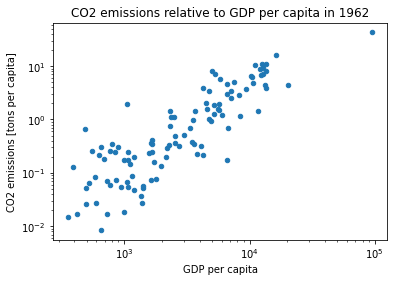

In [27]:
# Filter data to 1962
gapminder_1962 = gapminder[gapminder['Year'] == 1962]

# Plot emissions and GDP per capita
gapminder_1962.plot(x = 'gdpPercap', y = 'CO2 emissions (metric tons per capita)', kind = 'scatter', 
                    logx = True, logy = True, title = 'CO2 emissions relative to GDP per capita in 1962')
plt.xlabel('GDP per capita')
plt.ylabel('CO2 emissions [tons per capita]')
plt.show()

## 3. Quantifying the correlation

Upon inspecting the two relevant data columns, we see that they contain unequal numbers of non-null entries, indicating missed data (as alluded to [earlier](#1.-Read,-inspect,-and-clean-data)). We drop N/A values from both columns and use the `pearsonr` function from `scipy.stats` to calculate and display the Pearson R correlation value and associated p-value for the correlation between GDP per capita and CO2 emissions per capita in 1962. The p-value on the order of $10^{-46}$ indicates an extremely close correlation.

In [28]:
# Inspect the relevant data columns
display(gapminder_1962[['gdpPercap', 'CO2 emissions (metric tons per capita)']].info())

# Drop nan values, calculate Pearson R and p-value
gdp_vs_co2 = gapminder_1962.dropna(subset = ['gdpPercap', 'CO2 emissions (metric tons per capita)'])
r, p = pearsonr(gdp_vs_co2['gdpPercap'], gdp_vs_co2['CO2 emissions (metric tons per capita)'])
print("The Pearson R value for the correlation between GDP per capita and CO2 emissions per capita in 1962 is: " + str(r))
print("The p-value associated with that correlation is: " + str(p))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 259 entries, 0 to 2597
Data columns (total 2 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   gdpPercap                               128 non-null    float64
 1   CO2 emissions (metric tons per capita)  195 non-null    float64
dtypes: float64(2)
memory usage: 6.1 KB


None

The Pearson R value for the correlation between GDP per capita and CO2 emissions per capita in 1962 is: 0.9260816725019472
The p-value associated with that correlation is: 1.1286792210038754e-46


## 4. Finding the year with best GDP per capita and CO2 emissions correlation

We will first group the data by year and calculate and display the correlation matrix between GDP per capita (`gdpPercap`) and CO2 emissions per capita (`CO2 emissions (metric tons per capita`). From this table, we will isolate only the GDP per capita vs. CO2 emissions correlation for each year and sort these values in descending order. As we can see from the resulting table, the year with the closest correlation was 1967.

In [29]:
# Gropu data by year and create correlation matrix
yearly_corr = gapminder[['Year', 'gdpPercap', 'CO2 emissions (metric tons per capita)']].groupby('Year').corr()
display(yearly_corr)

# Pivot the last level of the index
yearly_corr = yearly_corr.unstack() 

# Keep only the GDP vs emissions column, reindex it, and sort the values
yearly_corr = pd.DataFrame(yearly_corr[('gdpPercap', 'CO2 emissions (metric tons per capita)')])
yearly_corr.columns = yearly_corr.columns.to_flat_index()
yearly_corr.columns = ['gdpPercap vs CO2 emissions correlation']
yearly_corr.sort_values(by = 'gdpPercap vs CO2 emissions correlation', inplace = True, ascending = False)

display(yearly_corr)


gdpPercap  \
Year                                                     
1962 gdpPercap                                1.000000   
     CO2 emissions (metric tons per capita)   0.926082   
1967 gdpPercap                                1.000000   
     CO2 emissions (metric tons per capita)   0.938792   
1972 gdpPercap                                1.000000   
     CO2 emissions (metric tons per capita)   0.842899   
1977 gdpPercap                                1.000000   
     CO2 emissions (metric tons per capita)   0.792834   
1982 gdpPercap                                1.000000   
     CO2 emissions (metric tons per capita)   0.816638   
1987 gdpPercap                                1.000000   
     CO2 emissions (metric tons per capita)   0.809553   
1992 gdpPercap                                1.000000   
     CO2 emissions (metric tons per capita)   0.809432   
1997 gdpPercap                                1.000000   
     CO2 emissions (metric tons per capita)   0.808140   
2002 gdpPercap                                1.000000   
     CO2 emissions (metric tons per capita)   0.800642   
2007 gdpPercap                                1.000000   
     CO2 emissions (metric tons per capita)   0.720417   

                                             CO2 emissions (metric tons per capita)  
Year                                                                                 
1962 gdpPercap                                                             0.926082  
     CO2 emissions (metric tons per capita)                                1.000000  
1967 gdpPercap                                                             0.938792  
     CO2 emissions (metric tons per capita)                                1.000000  
1972 gdpPercap                                                             0.842899  
     CO2 emissions (metric tons per capita)                                1.000000  
1977 gdpPercap                                                             0.792834  
     CO2 emissions (metric tons per capita)                                1.000000  
1982 gdpPercap                                                             0.816638  
     CO2 emissions (metric tons per capita)                                1.000000  
1987 gdpPercap                                                             0.809553  
     CO2 emissions (metric tons per capita)                                1.000000  
1992 gdpPercap                                                             0.809432  
     CO2 emissions (metric tons per capita)                                1.000000  
1997 gdpPercap                                                             0.808140  
     CO2 emissions (metric tons per capita)                                1.000000  
2002 gdpPercap                                                             0.800642  
     CO2 emissions (metric tons per capita)                                1.000000  
2007 gdpPercap                                                             0.720417  
     CO2 emissions (metric tons per capita)                                1.000000

,gdpPercap vs CO2 emissions correlation
Year,
1967,0.938792
1962,0.926082
1972,0.842899
1982,0.816638
1987,0.809553
1992,0.809432
1997,0.808140
2002,0.800642
1977,0.792834


## 5. Generating an interactive plot comparing GDP per capita and CO2 emissions

We will now explore the relationship between GDP per capita and CO2 emissions in an interactive graph that will also contain population size and continent information for each country. Based on the results [above](#4.-Finding-the-year-with-best-GDP-per-capita-and-CO2-emissions-correlation), we chose to visualize data from the year 1967.

Upon inspecting the graph, we can see that African countries as well as several Asian ones tend to cluster toward the bottom-left of the graph, indicating countries with low GDP per capita and CO2 emissions consistent with developing countries. Conversely, European and Oceanian countries tend to be both high in GDP per capita as well as CO2 emissions. With the exception of the USA and Canada, which cluster with European nations, countries in the Americas form a cluster of intermediate GDP and emissions.

In [30]:
# Filter and clean the GDP and emissions data for 1967
gapminder_1967 = gapminder[gapminder['Year'] == 1967].dropna(subset = ['gdpPercap', 'CO2 emissions (metric tons per capita)'])

# Create plotly interactive bubble plot
# Plotly tutorial I used for this: https://plotly.com/python/bubble-charts/#categorical-bubble-charts
# Kaggle plotly tutorial that's useful to understand the syntax: https://www.kaggle.com/kanncaa1/plotly-tutorial-for-beginners

# Create a reference to scale bubble sizes by
sizeref = 2*gapminder_1967['pop'].max()/(100**2) # 2 * max(array of size values)/(desired max size ** 2)

# Create a dictionary of continent-specific DataFrames
continents = np.unique(gapminder_1967['continent'].values)  #set the array of unique continents
gapminder_by_continent = {'Africa': gapminder_1967[gapminder_1967['continent'] == 'Africa'], 
                          'Americas': gapminder_1967[gapminder_1967['continent'] == 'Americas'], 
                          'Asia': gapminder_1967[gapminder_1967['continent'] == 'Asia'], 
                          'Europe': gapminder_1967[gapminder_1967['continent'] == 'Europe'], 
                          'Oceania': gapminder_1967[gapminder_1967['continent'] == 'Oceania']}
# Create empty figure
fig1 = go.Figure()

# Create a scatter trace for each continent
for continent_name, continent in gapminder_by_continent.items():
    fig1.add_trace(go.Scatter(x = continent['gdpPercap'],
                              y = continent['CO2 emissions (metric tons per capita)'],
                              name = continent_name,
                              mode = 'markers',
                              marker_size = continent['pop'],
                              hovertext = continent['Country Name']))

# Update traces to scale all bubbles
fig1.update_traces(mode = 'markers', marker = dict(sizemode = 'area', sizeref = sizeref, sizemin = 2))

# Include layout options
fig1.update_layout(title = dict(text = 'CO2 emissions vs. GDP per capita in 1967', x = 0.5, xanchor = 'center'), 
                   xaxis = dict(title = 'GDP per capita', type = 'log'), 
                   yaxis = dict(title = 'CO2 emissions [tons per capita]', type = 'log'))

fig1.show()

## 6. The relationship between continents and energy usage

Due to the incomplete dataset, we will first generate tables with the mean energy usage per continent and the number of countries in each continent from which we have data for each year. We will then create a bar graph for each year plotting the mean energy usage per continent.

We can see that across all years, there appears to be an effect of the `continent` variable on average energy usage. The first two time points, 1962 and 1967, are outliers in two senses: Firstly, there is no data for Africa and only one country for Asia in these years, and the Americas appear to have an unusually large energy consumption. However, when we consult the table with the number of countries with data in each year, we see that the Americas only have data for two countries in these first two years. These countries are the USA and Canada, which have high energy consumption. In later years, when central and south American countries contribute to the average, the Americas' energy consumption is between those of Africa and Asia.

We will now quantify this relationship between continent and ernegy usage. Given that we don't have a great deal of data for the first two time points don't have a lot of data, we will restrict our analysis to the years 1972 and onwards. One-way ANOVA (using the `f_oneway` function from `scipy.stats`) shows that there is a statistically significant main effect of the `continent` variable on energy usage at all investigated time points.

Year,1962,1967,1972,1977,1982,1987,1992,1997,2002,2007
continent,,,,,,,,,,
Africa,0,0,22,22,23,23,25,25,26,33
Americas,2,2,23,23,23,23,23,23,23,23
Asia,1,1,22,22,22,23,22,24,24,24
Europe,19,20,25,25,25,25,29,29,29,30
Oceania,2,2,2,2,2,2,2,2,2,2


Year,1962,1967,1972,1977,1982,1987,1992,1997,2002,2007
continent,,,,,,,,,,
Africa,NaN,NaN,624.271781,669.655049,740.649440,736.564835,692.362311,720.895102,709.606764,690.342727
Americas,5113.073215,6183.556112,1379.249574,1458.864502,1441.674520,1480.153739,1558.675537,1657.638067,1825.013654,2141.660257
Asia,1003.752254,1720.549744,1193.863297,1330.101303,1624.675685,1793.860708,1808.378056,2264.899455,2322.226805,2513.263757
Europe,1786.923933,2178.226794,2852.799023,3161.455380,3219.131342,3593.080919,3202.796260,3414.196077,3575.239271,3721.313840
Oceania,2482.218093,2940.750732,3326.183702,3863.138379,3915.230457,4112.666572,4383.846070,4864.178383,4953.510758,4961.421051


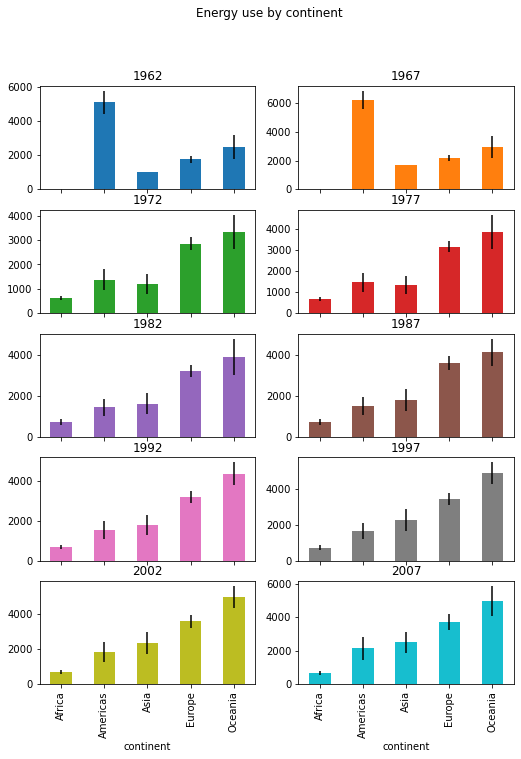

F statistic for the one-way ANOVA between continent and energy use in 1972: [7.36688854]
p-value for the one-way ANOVA between continent and energy use in 1972: [3.58384229e-05]

F statistic for the one-way ANOVA between continent and energy use in 1977: [8.45567897]
p-value for the one-way ANOVA between continent and energy use in 1977: [7.89425752e-06]

F statistic for the one-way ANOVA between continent and energy use in 1982: [7.55177463]
p-value for the one-way ANOVA between continent and energy use in 1982: [2.71800601e-05]

F statistic for the one-way ANOVA between continent and energy use in 1987: [8.49593531]
p-value for the one-way ANOVA between continent and energy use in 1987: [7.17355599e-06]

F statistic for the one-way ANOVA between continent and energy use in 1992: [7.89772596]
p-value for the one-way ANOVA between continent and energy use in 1992: [1.51266564e-05]

F statistic for the one-way ANOVA between continent and energy use in 1997: [7.0573195]
p-value for the o

In [31]:
# Gropu data by year and continent, then calculate the mean and error for energy use for each year/continent pair
gapminder_grouped = gapminder.groupby(['Year', 'continent'])
n = gapminder_grouped['Energy use (kg of oil equivalent per capita)'].count()
means = gapminder_grouped['Energy use (kg of oil equivalent per capita)'].mean()
errors = gapminder_grouped['Energy use (kg of oil equivalent per capita)'].std() / np.sqrt(gapminder_grouped['Energy use (kg of oil equivalent per capita)'].count()) # SEM

# Pivot the year index into column labels and inspect the data
n = n.unstack(level = 0)
means = means.unstack(level = 0)
errors = errors.unstack(level = 0)
display(n)
display(means)

# Plot bar graphs for each year
means.plot(yerr = errors, kind = 'bar', subplots = True, figsize = (8.5, 11), layout = (5, 2), 
           legend = False, title = 'Energy use by continent')
plt.show()

# For each year, create a clean list of energy use data per continent 
# Then perform a one-way ANOVA to determine if there is a main effect
for year in [1972, 1977, 1982, 1987, 1992, 1997, 2002, 2007]:
    africa = gapminder.loc[(gapminder['continent'] == 'Africa') & (gapminder['Year'] == year), 
                           ['Energy use (kg of oil equivalent per capita)']].dropna()

    americas = gapminder.loc[(gapminder['continent'] == 'Americas') & (gapminder['Year'] == year), 
                             ['Energy use (kg of oil equivalent per capita)']].dropna()

    asia = gapminder.loc[(gapminder['continent'] == 'Asia') & (gapminder['Year'] == year), 
                         ['Energy use (kg of oil equivalent per capita)']].dropna()

    europe = gapminder.loc[(gapminder['continent'] == 'Europe') & (gapminder['Year'] == year), 
                           ['Energy use (kg of oil equivalent per capita)']].dropna()

    oceania = gapminder.loc[(gapminder['continent'] == 'Oceania') & (gapminder['Year'] == year), 
                            ['Energy use (kg of oil equivalent per capita)']].dropna()

    F, p = f_oneway(africa, americas, asia, europe, oceania)
    print("F statistic for the one-way ANOVA between continent and energy use in " + str(year) + ": " + str(F))
    print("p-value for the one-way ANOVA between continent and energy use in " + str(year) + ": " + str(p) + "\n")

## 7. Comparing Europe and Asia's imports after 1990

For this analysis we will compare imports as a percentage of GDP between European and Asian countries after 1990. Since we are comparing two means, the appropriate statistical test is the Student-s t-test (the `ttest_ind` function from `scipy.stats`). For each timepoint after 1990, we collect the cleaned (non-N/A) imports data and compare them. We are not assuming equal variance in all the datasets for this analysis.

The statistics show that there was no significant difference between the imports as a percentage of GDP in Europe and Asia at any time after 1990.

In [32]:
# Tried to figure out how to do ANOVA with Tukey since we have data for all continents. 
# Couldn't figure out how to do Tukey's post-hoc with different sample sizes for each continent, 
# can't figure out how to make them into an array. Went with t-test instead.


# For each year since 1992, create clean import data series for Asia and Europe, then perform a t-test
for year in [1992, 1997, 2002, 2007]:
    asia = gapminder.loc[(gapminder['continent'] == 'Asia') & (gapminder['Year'] == year), 
                         ['Imports of goods and services (% of GDP)']].dropna()

    europe = gapminder.loc[(gapminder['continent'] == 'Europe') & (gapminder['Year'] == year), 
                           ['Imports of goods and services (% of GDP)']].dropna()

    t, p = ttest_ind(asia, europe, equal_var = False)
    print("t statistic for the t-test between Europe and Asia regarding import of goods in " + str(year) + ": " + str(F))
    print("p-value for the t-test between Europe and Asia regarding import of goods in " + str(year) + ": " + str(p) + "\n")


t statistic for the t-test between Europe and Asia regarding import of goods in 1992: [6.32844773]
p-value for the t-test between Europe and Asia regarding import of goods in 1992: [0.31104097]

t statistic for the t-test between Europe and Asia regarding import of goods in 1997: [6.32844773]
p-value for the t-test between Europe and Asia regarding import of goods in 1997: [0.23961665]

t statistic for the t-test between Europe and Asia regarding import of goods in 2002: [6.32844773]
p-value for the t-test between Europe and Asia regarding import of goods in 2002: [0.58908958]

t statistic for the t-test between Europe and Asia regarding import of goods in 2007: [6.32844773]
p-value for the t-test between Europe and Asia regarding import of goods in 2007: [0.95743803]



## 8. Finding the most densely populated country

For this analysis, we are interested in the average population density ranking for all countries across all the years for which we have data. To do this, we first clean the data to omit all entries where we don't have data on population density. We then group the data by year and rank all countries by their population density within each year. Next, we calculate each country's average ranking by summing the ranks across all available timepoints and dividing by the number of available timepoints. We then sort and display the first five entries from that list. As we can see, Macao and Monaco are tied for the most densely populated countries.

In [33]:
# Create clean population density dataset and add a column ranking each country's density within a year
gapminder_clean = gapminder.dropna(subset = ['Population density (people per sq. km of land area)'])
gapminder_clean['pop_rank'] = gapminder_clean.groupby('Year')['Population density (people per sq. km of land area)'].rank(ascending = False)

# Create an average rank for each country and display the top ranked countries
pop_rank_avg = gapminder_clean.groupby('Country Name')['pop_rank'].sum()/gapminder_clean.groupby('Country Name')['pop_rank'].count()
pop_rank_avg.rename("Average population density rank", inplace = True)
display(pd.DataFrame(pop_rank_avg.sort_values()).head())

<ipython-input-33-4377e9e92f60>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Average population density rank
Country Name,
"Macao SAR, China",1.5
Monaco,1.5
"Hong Kong SAR, China",3.1
Singapore,3.9
Gibraltar,5.0


## 9. Who improved their life expectancy most?

This final analysis concerns itself with life expectancy data. We want to know what country saw the largest increase in life expectancy from 1962 to 2007. We begin by pivoting the data to show only life expectancy by country and year. Next, we clean the data table to omit countries for which we don't have data for all years and inspect the resulting table. Finally, we add a column to the table containing the difference in life expectancies between 1962 and 2007. We sort the table by this new column and display the top 5 entries. From this, we can see that the Maldives has seen the largest increase in life expectancy, nearly 37 years.

In [34]:
# Pivot the data to create a table with life expectancies by country and year and clean it
gapminder_life_exp = gapminder.pivot(index = 'Country Name', columns = 'Year', values = 'Life expectancy at birth, total (years)')
gapminder_life_exp.dropna(inplace = True)
display(gapminder_life_exp.head())

# Add a column with the increase in life expectancy from 1962 to 2007, then display the sorted data
gapminder_life_exp ['Increase in life expectancy between 1962 and 2007'] = gapminder_life_exp[2007] - gapminder_life_exp[1962]
display(gapminder_life_exp.sort_values(by = 'Increase in life expectancy between 1962 and 2007', ascending = False).head())

Year,1962,1967,1972,1977,1982,1987,1992,1997,2002,2007
Country Name,,,,,,,,,,
Afghanistan,33.219902,35.389415,37.610146,40.110146,43.230732,47.296341,51.362927,54.017829,55.857195,57.833829
Albania,64.162854,66.287220,67.585951,69.456171,70.685122,71.861951,71.900805,72.898098,75.154610,76.470293
Algeria,47.045000,49.187512,51.171805,54.578268,60.786341,65.487146,67.209683,68.921220,71.014854,72.898366
Angola,33.787585,35.799976,37.826927,39.581366,40.408000,40.973878,41.313024,43.062122,46.711732,49.435732
Antigua and Barbuda,62.598537,64.488073,66.188268,67.730756,69.140927,70.432634,71.634707,72.757561,73.815439,74.803220


Year,1962,1967,1972,1977,1982,1987,1992,1997,2002,2007,Increase in life expectancy between 1962 and 2007
Country Name,,,,,,,,,,,
Maldives,38.483561,41.914683,45.736146,50.127122,54.897732,58.974439,63.093293,67.278049,71.929195,75.399707,36.916146
Bhutan,33.094146,35.107024,38.471488,42.600829,46.447244,50.133756,54.040512,58.035244,62.435829,66.293098,33.198951
Timor-Leste,34.739049,37.606610,39.098098,32.850268,38.186220,45.839122,50.280268,56.165512,61.237634,65.824195,31.085146
Tunisia,43.341683,47.800512,53.450244,58.936732,63.803659,67.023073,70.756098,71.902439,73.000000,74.202439,30.860756
Oman,44.300512,48.107073,51.859634,56.759659,61.517195,65.370561,68.405488,70.978976,73.213317,75.123610,30.823098
